### * git\after_subtle\after_subtle_kp_moseq.ipynb 돌려서 stats_subtle_df 생성 후, 아래 코드 run.

## Compare between groups

Test for statistically significant differences between groups of recordings. The code below takes a syllable property (e.g. frequency or duration), plots its disribution for each syllable across for each group, and also tests whether the property differs significantly between groups. The results are summarized in a plot that is saved to `{project_dir}/{model_name}/analysis_figures`.

There are two options for setting the order of syllables along the x-axis. When `order='stat'`, syllables are sorted by the mean value of the statistic. When `order='diff'`, syllables are sorted by the magnitude of difference between two groups that are determined by the `ctrl_group` and `exp_group` keywords. Note `ctrl_group` and `exp_group` are not related to significance testing.

(Warning) stats_subtle_df에 있는 모든 group간 통계비교를 함.
만약 stats_subtle_df에 프로젝트 내 여러 group들이 섞여 있어서 통계비교를 원하지 않는다면 아래와 같이 원하는 그룹만 따로 추출하는 과정이 필요함.

In [1]:
import os
import pandas as pd
import keypoint_moseq as kpms

project_dir=r'C:\Users\MyPC\Desktop\git\SUBTLE_June\project\neuroventi\model1' # the full path to the project directory
model_name='results_testset1' # name of model to analyze (e.g. something like `2023_05_23-15_19_03`)
index_filename = "index.csv"
group1 = 'G1'
group2 = 'G2'
group3 = 'G3'

stats_df = pd.read_csv(os.path.join(project_dir, model_name, 'stats_subtle_df.csv'))
groups = [group1, group2, group3] # groups to be plotted
stats_df = stats_df[stats_df['group'].isin(groups)]

c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1172: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\SUBTLE_June\project\neuroventi\model1\results_testset1\figures\frequency_stat_stats.png


c:\Users\MyPC\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:1172: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




Saved figure to C:\Users\MyPC\Desktop\git\SUBTLE_June\project\neuroventi\model1\results_testset1\figures\duration_stat_stats.png


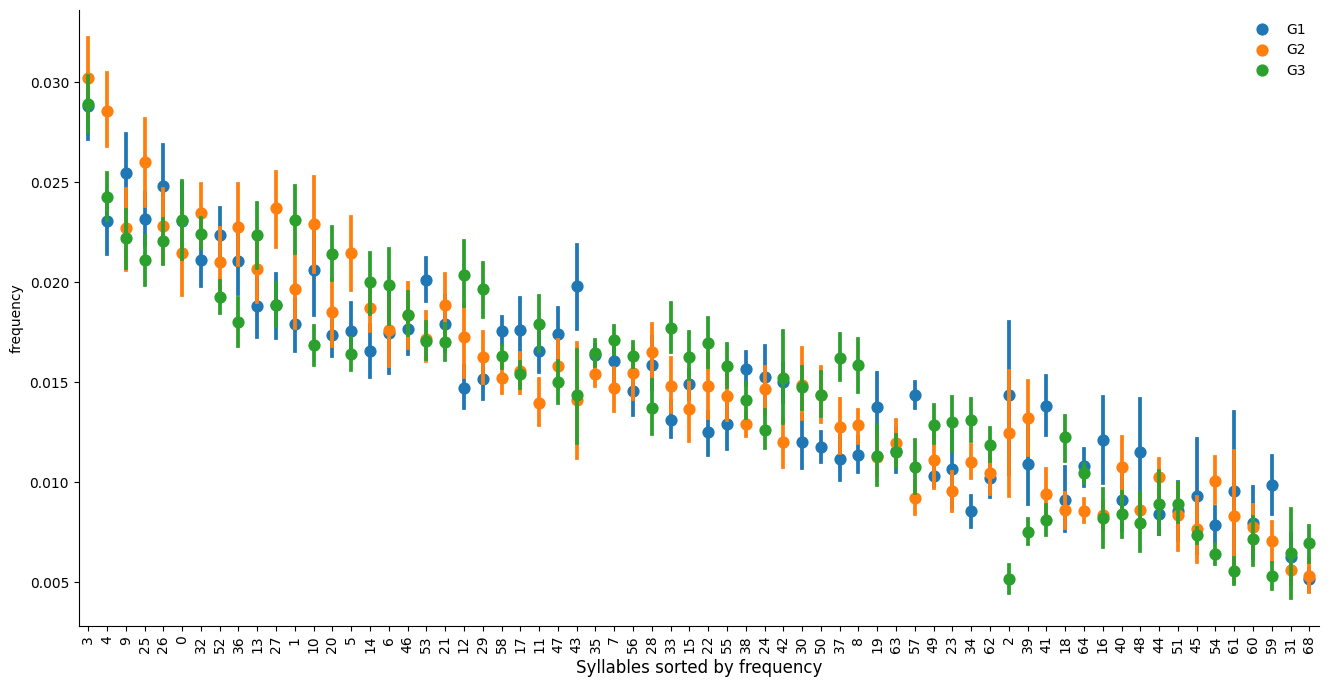

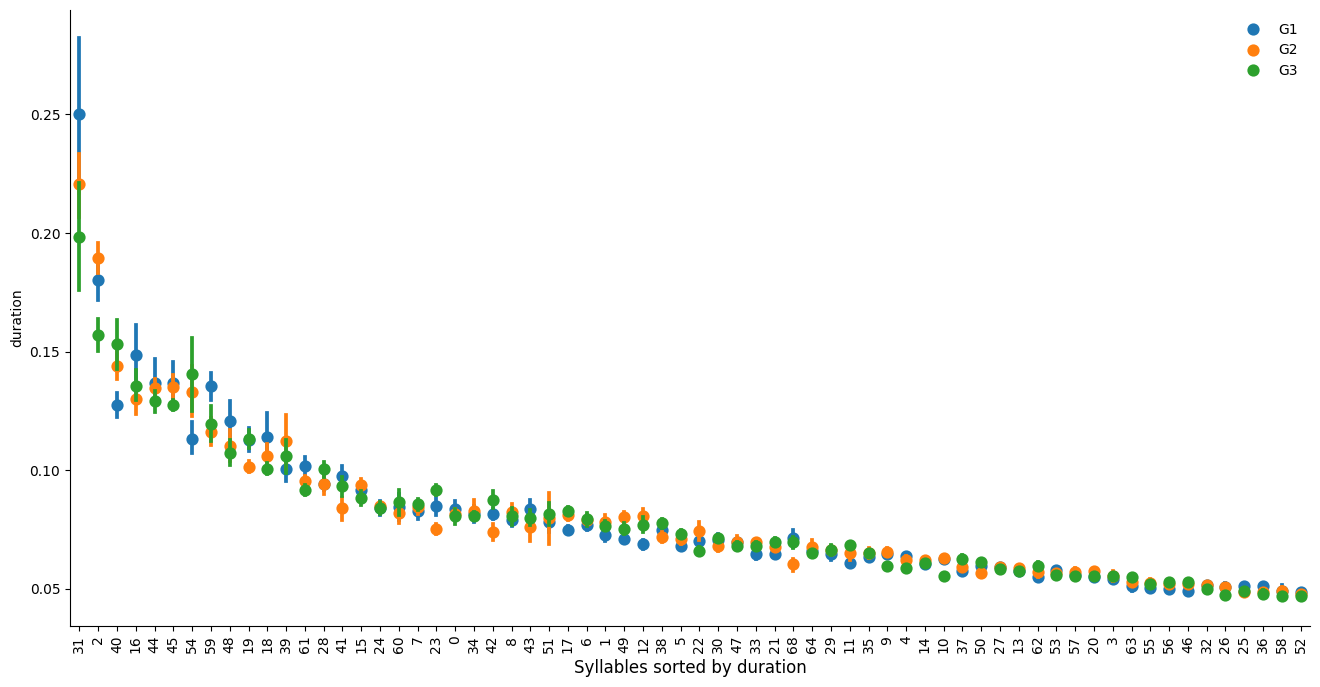

In [6]:
stats = ['frequency', 'duration']

for stat in stats:
    kpms.plot_syll_stats_with_sem(
    stats_df, project_dir, model_name,
    plot_sig=False,    # whether to mark statistical significance with a star
    thresh=0.05,      # significance threshold
    stat=stat, #statistic to be plotted (e.g. 'duration' or 'velocity_px_s_mean')
    order='stat',     # order syllables by overall frequency ("stat") or degree of difference ("diff")
    # ctrl_group=group1,   # name of the control group for statistical testing
    # exp_group=group2,    # name of the experimental group for statistical testing
    figsize=(16, 8),   # figure size    
    join=False,        # whether to join syllables with a line
    groups=groups, # groups to be plotted
    #groups=stats_df['group'].unique(), # groups to be plotted
    SUBTLE=True,      # whether to use a SUBTLE dataset
)

### Transition matrices
### 주의! trsans_mats, usages의 경우 index (0,1,2,...)가 groups의 순서대로. groups 이름이 key로 할당되는게 아님.
### 따라서 kpms.generate_transition_matrices()의 output인 groups를 임의로 groups=['resilient','susceptible'] 등으로 바꾸지 말기.
Generate heatmaps showing the transition frequencies between syllables.

Group(s): Setd1a_het_f, Setd1a_wt_f
Saved figure to C:\Users\MyPC\Desktop\git\SUBTLE_June\project\Broad\model_subtle_tr_0.4_n_24_20231108_034025\figures\transition_matrices.png


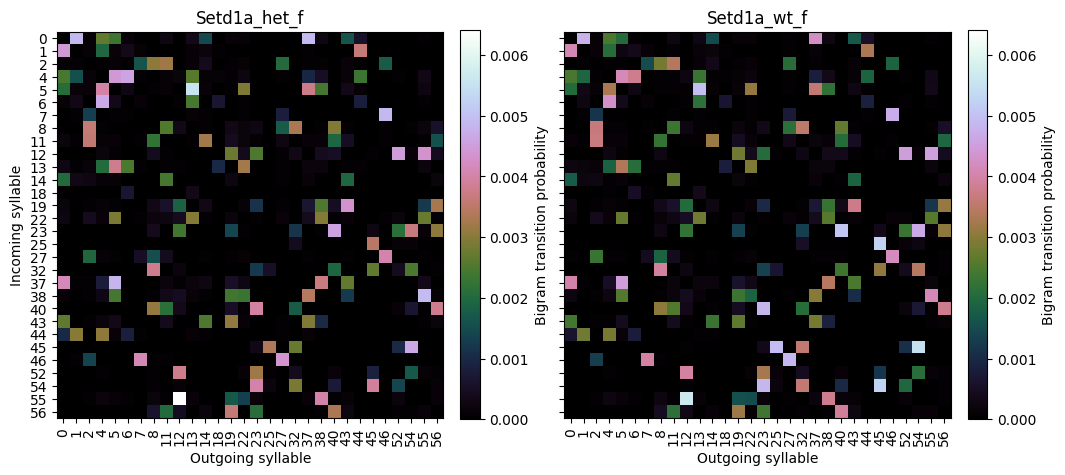

In [33]:
min_frequency = 0.015    # threshold frequency for including a syllable in the analysis
normalize='bigram' # normalization method ("bigram", "rows" or "columns")

trans_mats, usages, groups, syll_include=kpms.generate_transition_matrices(
    project_dir, model_name, normalize=normalize,
    min_frequency=min_frequency, # minimum syllable frequency to include
    index_filename=index_filename,
    SUBTLE=True
)    

kpms.visualize_transition_bigram(
    project_dir, model_name, groups, trans_mats, syll_include, normalize=normalize, 
    show_syllable_names=True # label syllables by index (False) or index and name (True)
)

### Syllable Transition Graph
Render transition rates in graph form, where nodes represent syllables and edges represent transitions between syllables, with edge width showing transition rate for each pair of syllables (secifically the max of the two transition rates in each direction).

Saved figure to C:\Users\MyPC\Desktop\git\SUBTLE_June\project\Broad\model_subtle_tr_0.4_n_24_20231108_034025\figures\transition_graphs.png


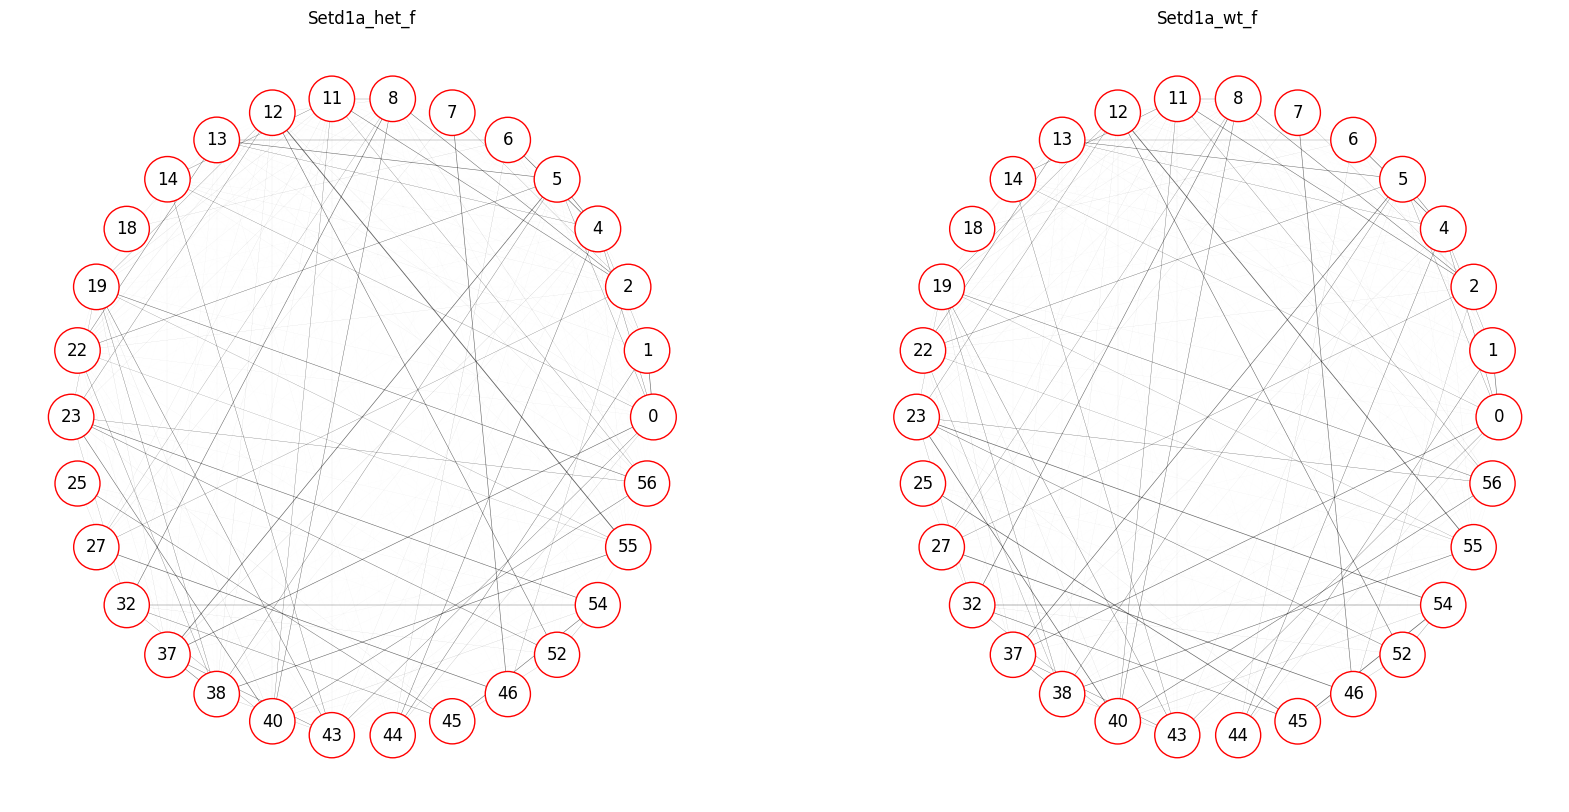

In [34]:
# Generate a transition graph for each single group

kpms.plot_transition_graph_group(
    project_dir, model_name, 
    groups, trans_mats, usages, syll_include, 
    layout='circular',        # transition graph layout ("circular" or "spring")
    show_syllable_names=False # label syllables by index (False) or index and name (True)
)

Saved figure to C:\Users\MyPC\Desktop\git\SUBTLE_June\project\Broad\model_subtle_tr_0.4_n_24_20231108_034025\figures\transition_graphs_diff.png


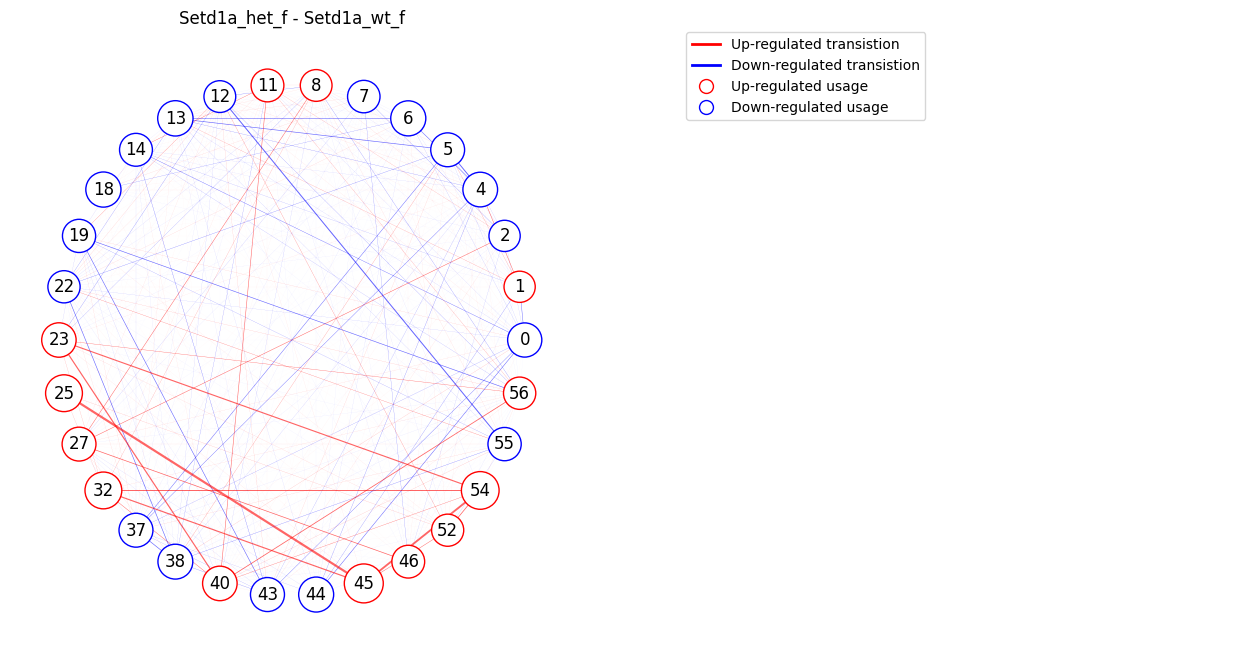

In [35]:
# Generate a difference-graph for each pair of groups.

kpms.plot_transition_graph_difference(project_dir, model_name, 
                                      groups, trans_mats, usages, syll_include, 
                                      layout='circular') # transition graph layout ("circular" or "spring")